In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score , TimeSeriesSplit , RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.metrics import roc_curve , plot_roc_curve , plot_confusion_matrix , auc


import cufflinks as cf
cf.set_config_file(offline=True)
#https://github.com/santosjorge/cufflinks

import seaborn as sns
import plotly.graph_objs as go


import yfinance as yf

In [2]:
df1 = yf.download('^SET.bk', start='2010-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,736.659973,737.140015,725.650024,732.280029,732.280029,2368700
2010-01-05,737.380005,740.859985,730.799988,732.109985,732.109985,3028800
2010-01-06,734.729980,737.119995,732.659973,735.729980,735.729980,3696400
2010-01-07,738.770020,740.909973,733.750000,734.630005,734.630005,3693600
2010-01-08,736.289978,740.909973,736.030029,738.960022,738.960022,2693600
...,...,...,...,...,...,...
2023-12-21,1394.910034,1407.869995,1394.280029,1404.839966,1404.839966,3444400
2023-12-22,1407.390015,1407.569946,1397.930054,1405.089966,1405.089966,2643700
2023-12-26,1413.449951,1413.449951,1413.449951,1413.449951,1413.449951,0


In [4]:
list_of_stock = ['PTT.BK','AOT.BK','DELTA.BK','RATCH.BK', 'EGCO.BK', 'PTTEP.BK']
df2 = yf.download(list_of_stock, start='2010-01-01', end='2022-12-31')['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [5]:
df2.iplot(kind='line')

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

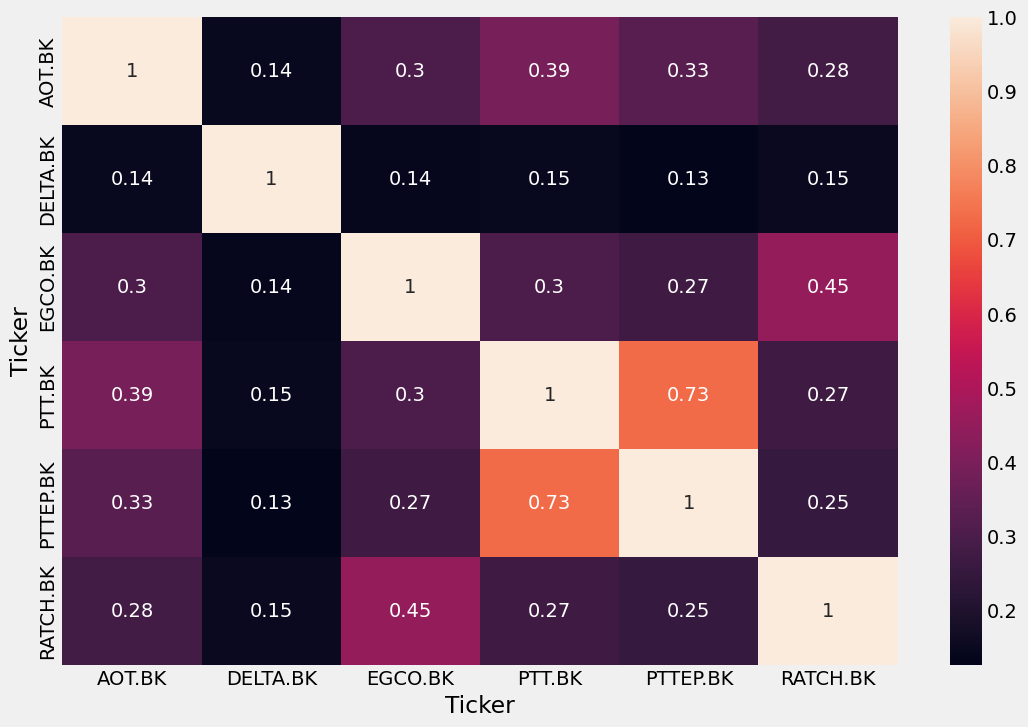

In [6]:
df3 = df2.pct_change().dropna()
sns.heatmap(df3.corr(), annot=True)

In [7]:
df3.iplot(kind='histogram', subplots=True)

In [8]:
df = df1.copy()
df['Adj Close'].iplot(kind='line')

In [9]:
df['Forward Returns'] = np.log(df['Adj Close']).diff().shift(-1)

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume,Forward Returns
Date,,,,,,,
2010-01-04,736.659973,737.140015,725.650024,732.280029,732.280029,2368700,-0.000232
2010-01-05,737.380005,740.859985,730.799988,732.109985,732.109985,3028800,0.004932
2010-01-06,734.729980,737.119995,732.659973,735.729980,735.729980,3696400,-0.001496
2010-01-07,738.770020,740.909973,733.750000,734.630005,734.630005,3693600,0.005877
2010-01-08,736.289978,740.909973,736.030029,738.960022,738.960022,2693600,0.010754
...,...,...,...,...,...,...,...
2023-12-21,1394.910034,1407.869995,1394.280029,1404.839966,1404.839966,3444400,0.000178
2023-12-22,1407.390015,1407.569946,1397.930054,1405.089966,1405.089966,2643700,0.005932
2023-12-26,1413.449951,1413.449951,1413.449951,1413.449951,1413.449951,0,-0.002139


In [11]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Forward Returns
Date,,,,,,,
2010-01-04,736.659973,737.140015,725.650024,732.280029,732.280029,2368700,-0.000232
2010-01-05,737.380005,740.859985,730.799988,732.109985,732.109985,3028800,0.004932
2010-01-06,734.729980,737.119995,732.659973,735.729980,735.729980,3696400,-0.001496
2010-01-07,738.770020,740.909973,733.750000,734.630005,734.630005,3693600,0.005877
2010-01-08,736.289978,740.909973,736.030029,738.960022,738.960022,2693600,0.010754
...,...,...,...,...,...,...,...
2023-12-20,1398.010010,1406.400024,1395.189941,1400.369995,1400.369995,3656100,0.003187
2023-12-21,1394.910034,1407.869995,1394.280029,1404.839966,1404.839966,3444400,0.000178
2023-12-22,1407.390015,1407.569946,1397.930054,1405.089966,1405.089966,2643700,0.005932


In [12]:
df.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Forward Returns    0
dtype: int64

In [13]:
df['O-C'] = df.Open - df.Close
df['sma20'] = ta.sma(df['Close'], length=20)


df.dropna(inplace=True)

In [14]:
X = df[['O-C', 'sma20']].values

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume,Forward Returns,O-C,sma20
Date,,,,,,,,,
2010-01-29,685.140015,696.549988,684.260010,696.549988,696.549988,1927300,0.001521,-11.409973,727.280997
2010-02-01,692.659973,697.609985,685.690002,697.609985,697.609985,1437500,-0.005087,-4.950012,725.547495
2010-02-02,702.349976,703.030029,694.070007,694.070007,694.070007,1640700,0.019377,8.279968,723.645496
2010-02-03,698.030029,707.780029,697.710022,707.650024,707.650024,2974500,-0.007276,-9.619995,722.241498
2010-02-04,705.330017,708.510010,702.010010,702.520020,702.520020,2319900,-0.015941,2.809998,720.635999
...,...,...,...,...,...,...,...,...,...
2023-12-20,1398.010010,1406.400024,1395.189941,1400.369995,1400.369995,3656100,0.003187,-2.359985,1390.408514
2023-12-21,1394.910034,1407.869995,1394.280029,1404.839966,1404.839966,3444400,0.000178,-9.929932,1389.470013
2023-12-22,1407.390015,1407.569946,1397.930054,1405.089966,1405.089966,2643700,0.005932,2.300049,1389.017010


In [16]:
y = np.where(df['Forward Returns'] >= 0, 1, 0)
y

array([1, 0, 1, ..., 1, 0, 1])

In [17]:
# Value counts for class 1 and 0
pd.Series(y).value_counts()

1    1811
0    1571
dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2705, 2) (677, 2) (2705,) (677,)


In [19]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier())])

In [20]:
# Target classes
class_names = pipe.classes_
class_names

array([0, 1])

In [21]:
y_pred = pipe.predict(X_test)

In [22]:
acc_train = accuracy_score(y_train, pipe.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

In [23]:
print(f'Train Accuracy: {acc_train:.2f}')
print(f'Test Accuracy: {acc_test:.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.52


Prediction Quality

In [24]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

189 145 179 164


c:\Users\Thorn\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



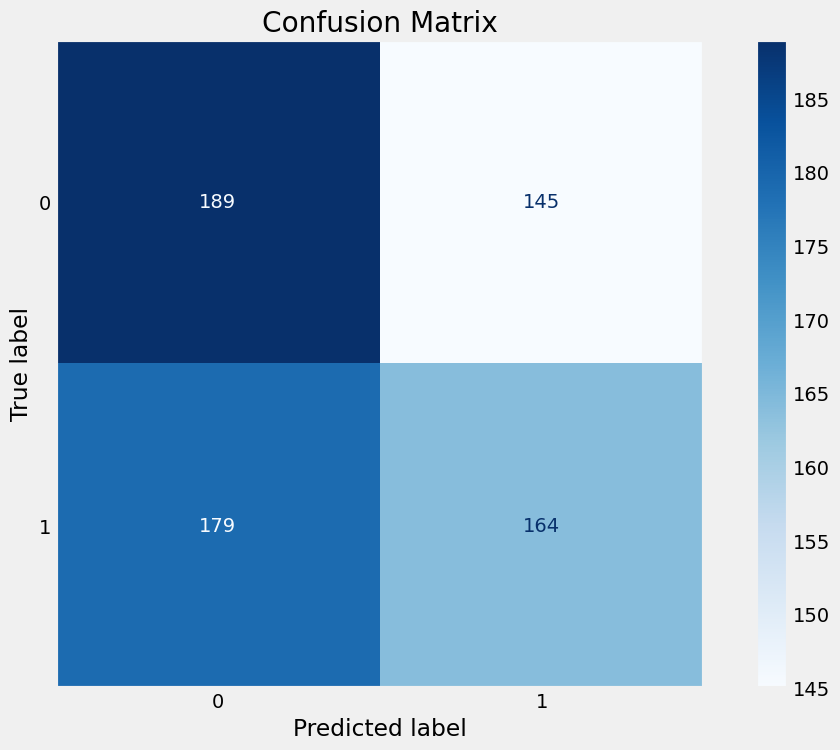

In [25]:
# Plot confusion matrix
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

In [26]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       334
           1       0.53      0.48      0.50       343

    accuracy                           0.52       677
   macro avg       0.52      0.52      0.52       677
weighted avg       0.52      0.52      0.52       677



c:\Users\Thorn\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



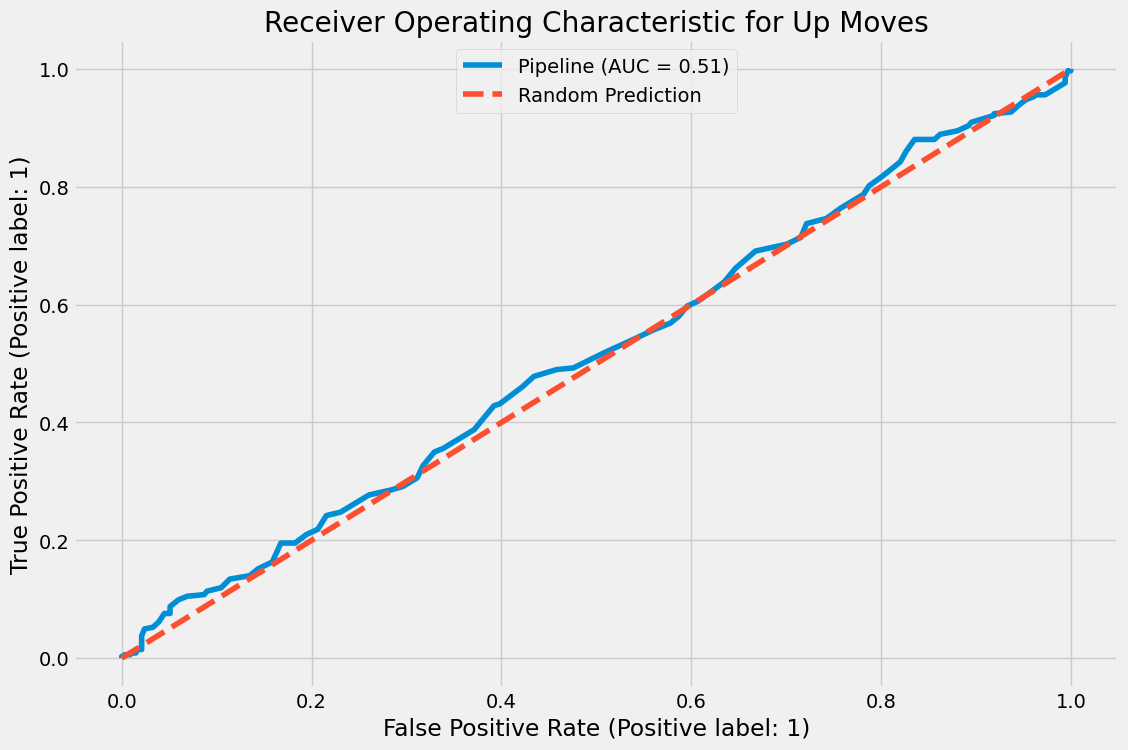

In [27]:
# Random Prediction
r_prob = [0 for _ in range(len(y_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, r_prob, pos_label=1)

# Plot ROC Curve
plot_roc_curve(pipe, X_test, y_test)
plt.plot(r_fpr, r_tpr, linestyle='dashed', label='Random Prediction')
plt.title('Receiver Operating Characteristic for Up Moves')
plt.legend(loc=9)
plt.show()

Hyper Parameter Tuning

In [28]:
# First 3 split
tscv = TimeSeriesSplit(n_splits=3, gap=1)
for train, test in tscv.split(X):
    print(train, test)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [29]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5, gap=1)

In [30]:
# Get parameters list
pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': RandomForestClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [31]:
random_grid = {
    'model__n_estimators': list(range(100, 2000, 100)),
    'model__max_features': ['auto', 'sqrt', 'log2', None],
    'model__max_depth': list(range(10, 110, 10)) + [None],
    'model__min_samples_split': [2, 5, 10, 20, 30, 40],
    'model__min_samples_leaf': [1, 2, 7, 12, 14, 16, 20],
    'model__bootstrap': [True, False]
}

print(random_grid)

{'model__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900], 'model__max_features': ['auto', 'sqrt', 'log2', None], 'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'model__min_samples_split': [2, 5, 10, 20, 30, 40], 'model__min_samples_leaf': [1, 2, 7, 12, 14, 16, 20], 'model__bootstrap': [True, False]}


In [32]:
# Perform Gridsearch and fit
grid_search = RandomizedSearchCV(pipe, random_grid, scoring='roc_auc', n_jobs=1, cv=tscv, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=1, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_jobs=1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100, None],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2', None],
                                        'model__min_samples_leaf': [1, 2, 7, 12,
                                                                    14, 16,
                                                   

In [33]:
# Best Params
grid_search.best_params_

{'model__n_estimators': 1800,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 7,
 'model__max_features': 'sqrt',
 'model__max_depth': 70,
 'model__bootstrap': False}

In [34]:
# Best Score
grid_search.best_score_

0.4990768068475552

Fit the Real Model

In [35]:
# Extract best parameters and remove the 'model__' prefix
best_params = grid_search.best_params_
cleaned_best_params = {key.replace('model__', ''): value for key, value in best_params.items()}

# Create the RandomForestClassifier with the cleaned parameters
rand_frst_clf = RandomForestClassifier(**cleaned_best_params)

In [36]:
rand_frst_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_leaf=7, min_samples_split=10,
                       n_estimators=1800)

In [37]:
y_pred = rand_frst_clf.predict(X_test)

In [38]:
# Measure Accuracy
acc_train = accuracy_score(y_train, rand_frst_clf.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

In [39]:
# Print Accuracy
print(f'\n Training Accuracy \t: {acc_train :0.4} \n Test Accuracy \t\t: {acc_test :0.4}')


 Training Accuracy 	: 0.8551 
 Test Accuracy 		: 0.5244


In [40]:
# Confusion Matrix for binary classification
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

188 146 176 167


c:\Users\Thorn\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



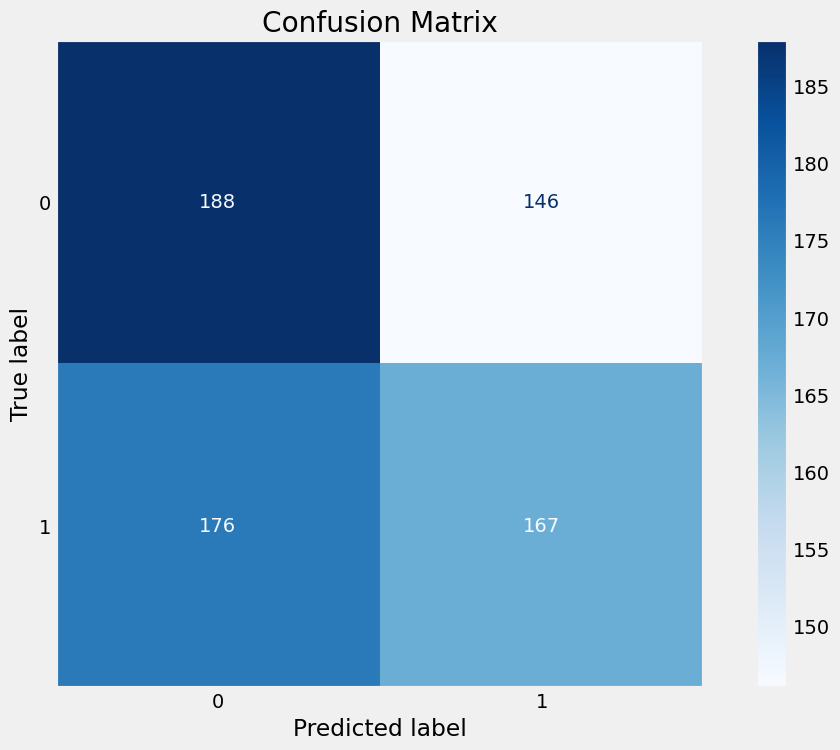

In [41]:
# Plot confusion matrix
plot_confusion_matrix(rand_frst_clf, X_test, y_test, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

c:\Users\Thorn\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



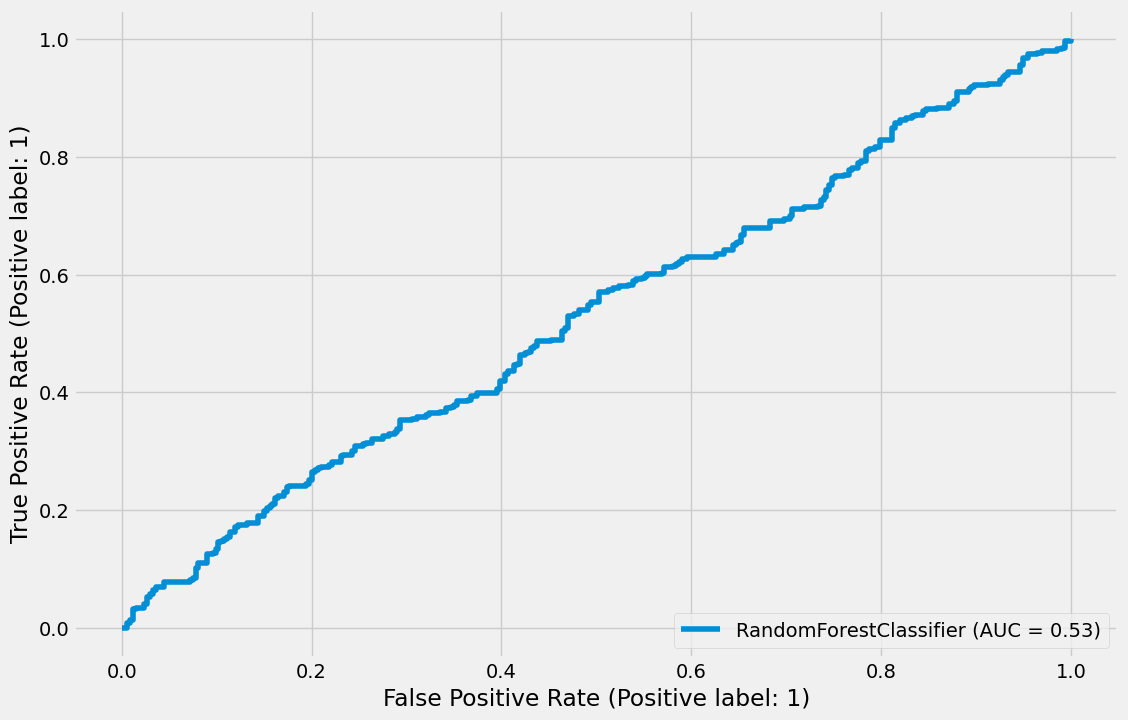

In [42]:
# Plot ROC Curve
plot_roc_curve(rand_frst_clf, X_test, y_test);

In [43]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       334
           1       0.53      0.49      0.51       343

    accuracy                           0.52       677
   macro avg       0.53      0.52      0.52       677
weighted avg       0.53      0.52      0.52       677



Trading Strategy

In [44]:
df1 = df.copy()
df1['Signal'] = rand_frst_clf.predict(X)

In [45]:
# Strategy Returns
df1['Strategy'] = df1['Forward Returns'] * df1['Signal'].fillna(0)

df1.index = pd.to_datetime(df1.index).tz_localize('utc')

In [46]:
df1

,Open,High,Low,Close,Adj Close,Volume,Forward Returns,O-C,sma20,Signal,Strategy
Date,,,,,,,,,,,
2010-01-29 00:00:00+00:00,685.140015,696.549988,684.260010,696.549988,696.549988,1927300,0.001521,-11.409973,727.280997,1,0.001521
2010-02-01 00:00:00+00:00,692.659973,697.609985,685.690002,697.609985,697.609985,1437500,-0.005087,-4.950012,725.547495,0,-0.000000
2010-02-02 00:00:00+00:00,702.349976,703.030029,694.070007,694.070007,694.070007,1640700,0.019377,8.279968,723.645496,0,0.000000
2010-02-03 00:00:00+00:00,698.030029,707.780029,697.710022,707.650024,707.650024,2974500,-0.007276,-9.619995,722.241498,1,-0.007276
2010-02-04 00:00:00+00:00,705.330017,708.510010,702.010010,702.520020,702.520020,2319900,-0.015941,2.809998,720.635999,0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 00:00:00+00:00,1398.010010,1406.400024,1395.189941,1400.369995,1400.369995,3656100,0.003187,-2.359985,1390.408514,0,0.000000
2023-12-21 00:00:00+00:00,1394.910034,1407.869995,1394.280029,1404.839966,1404.839966,3444400,0.000178,-9.929932,1389.470013,1,0.000178
2023-12-22 00:00:00+00:00,1407.390015,1407.569946,1397.930054,1405.089966,1405.089966,2643700,0.005932,2.300049,1389.017010,0,0.000000


In [47]:
# Import pyfolio
import pyfolio as pf

c:\Users\Thorn\AppData\Local\Programs\Python\Python37\lib\site-packages\pyfolio\pos.py:27: UserWarning:

Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.



In [48]:
#find the first date of testing data
y = df1.tail(len(X_test)).head(1).index[0]
first_date_of_x_test = y.strftime('%Y-%m-%d')
print(first_date_of_x_test)

2021-03-10


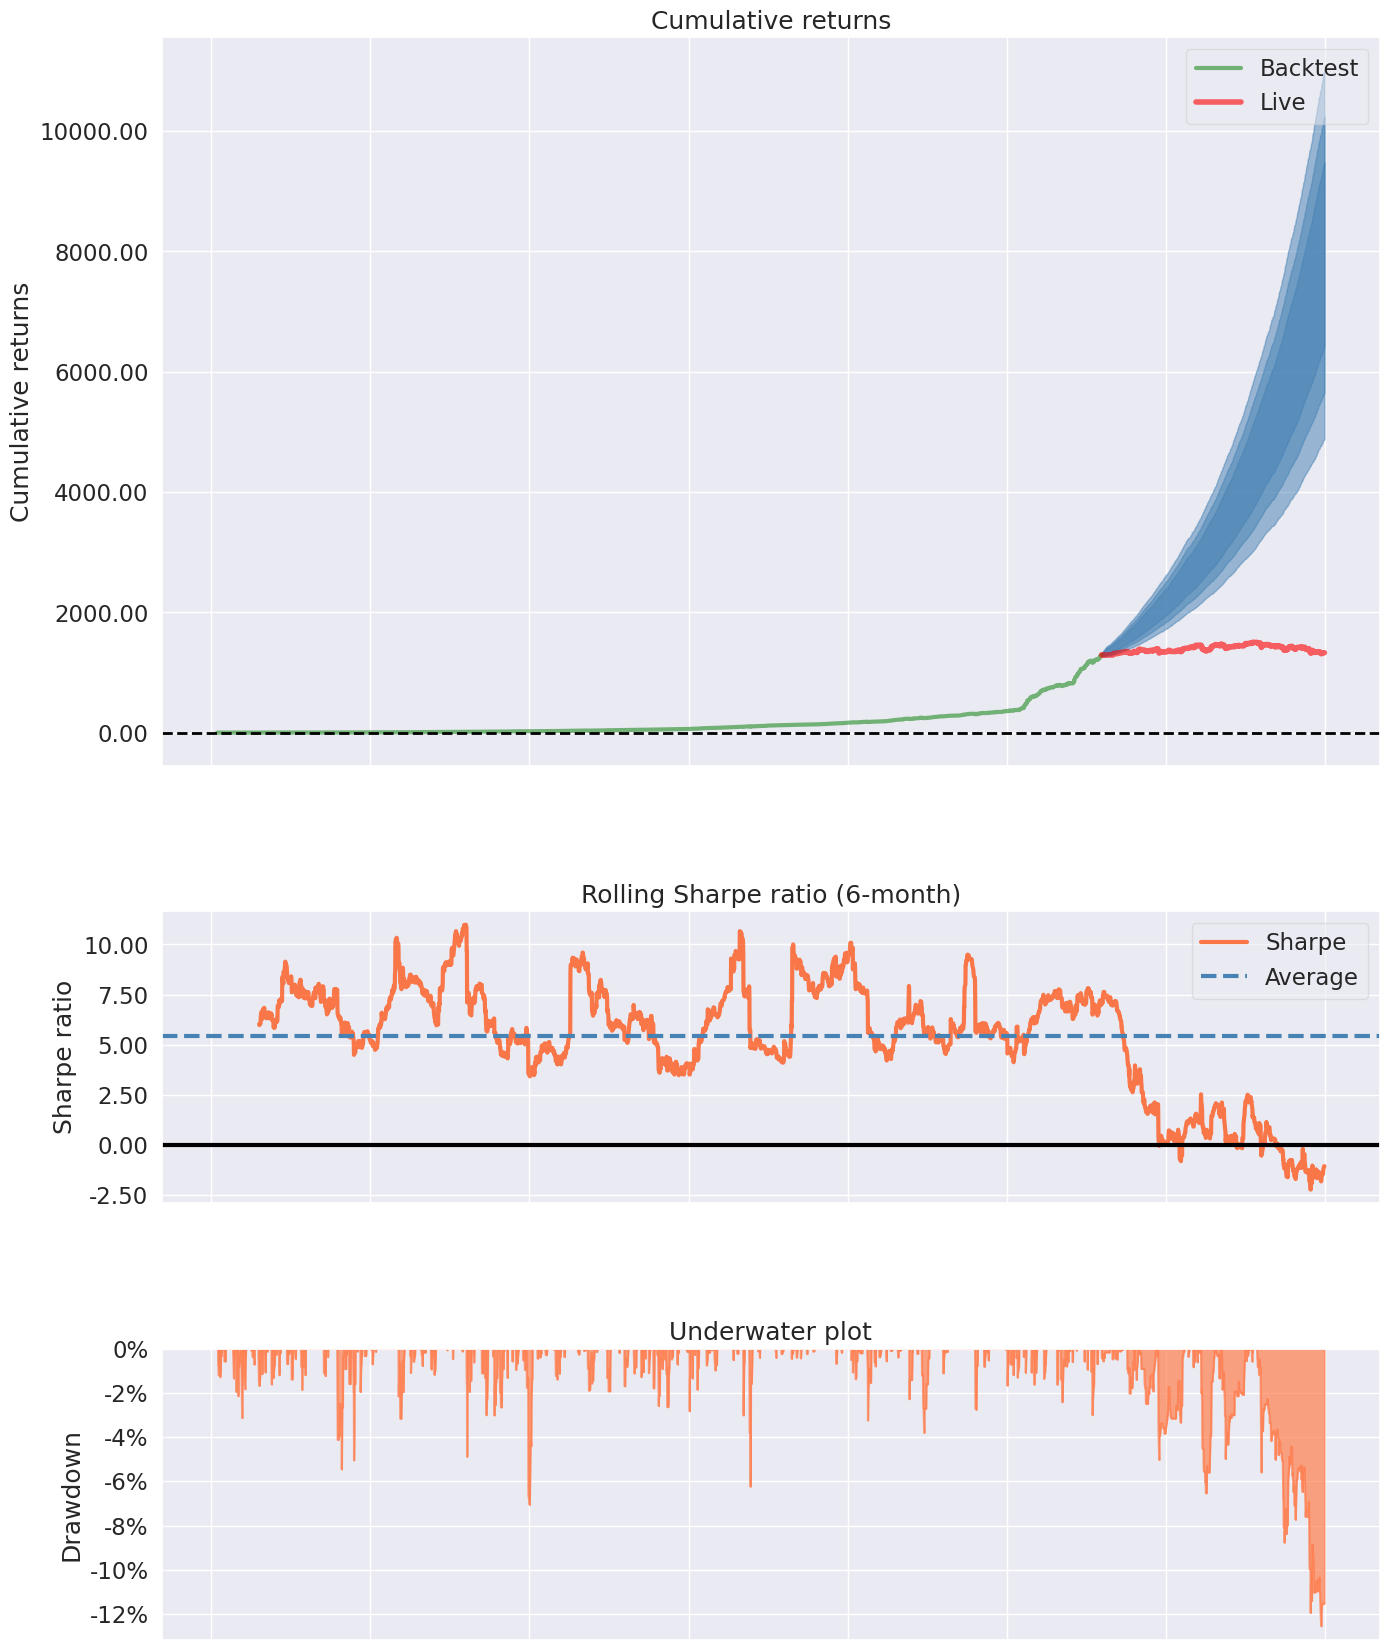

In [49]:
# Live start date first_date_of_x_test

pf.create_simple_tear_sheet(df1['Strategy'], live_start_date=first_date_of_x_test)

<AxesSubplot:title={'center':'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

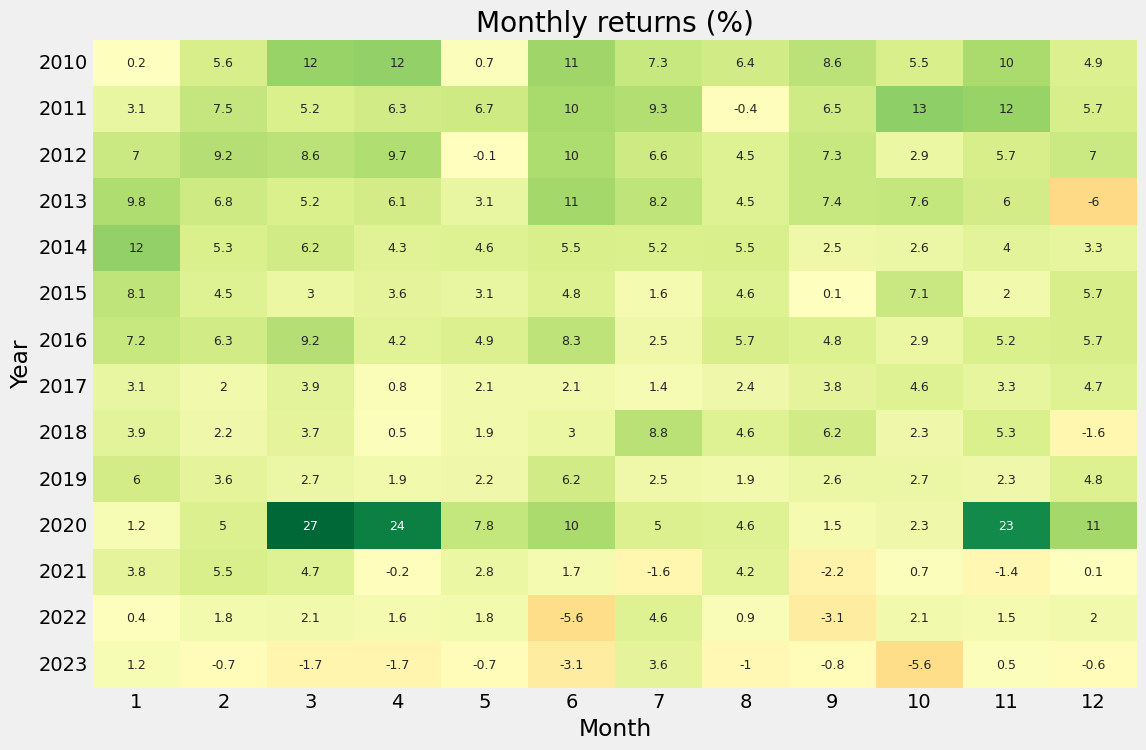

In [50]:
pf.plot_monthly_returns_heatmap(df1['Strategy'])

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

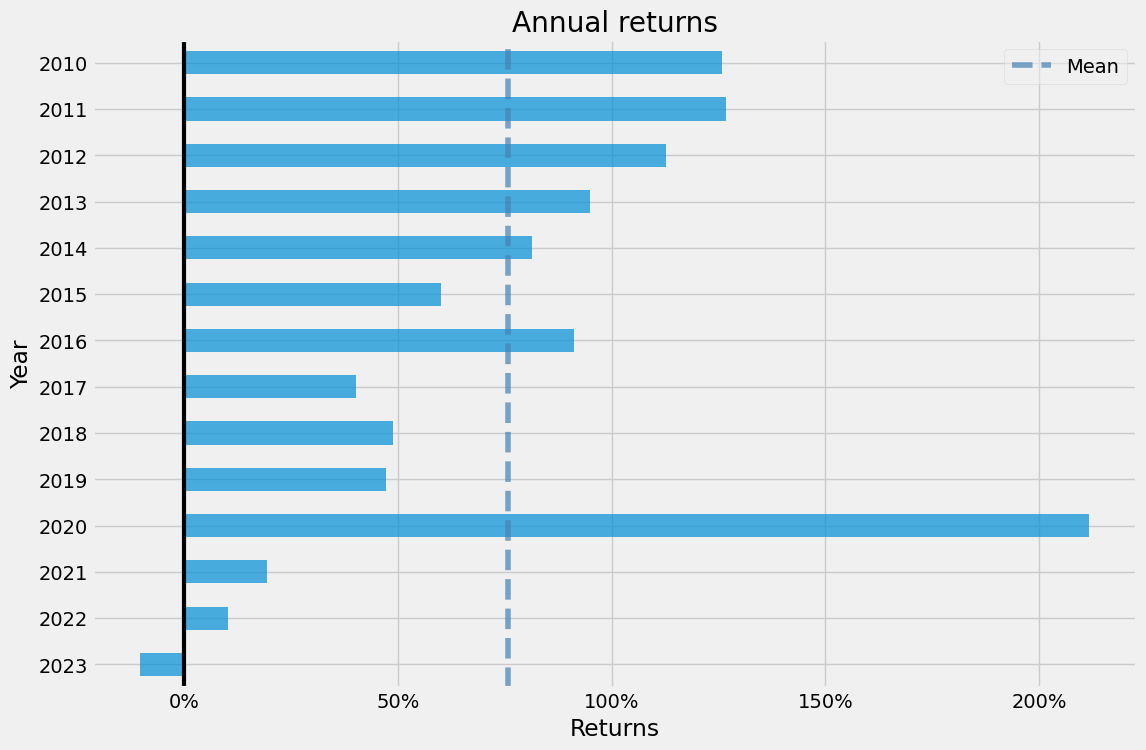

In [51]:
pf.plot_annual_returns(df1['Strategy'])